In [4]:
import numpy as np
from IPython.display import clear_output
from modules.plotter import print_resoult
from modules.golomb_simple import init_simple_problem

UDP = init_simple_problem()

## Genetico

### Pygad
Docs: https://pygad.readthedocs.io/en/stable/pygad.html

/home/mott/.local/lib/python3.10/site-packages/pygad/visualize/plot.py:109: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplotlib.pyplot.legend()


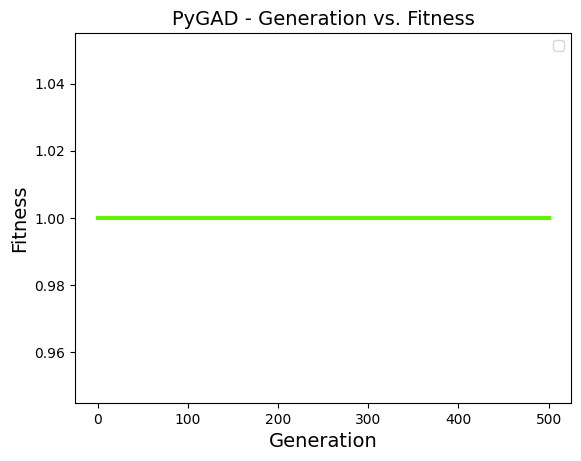

solution:  [ 0.57975798  0.66156616  0.26392639  0.17271727 -0.10331033 -0.54375438
 -0.14031403  0.42194219  0.66876688  0.71677168  0.02690269  0.86158616
 -0.29612961  0.89658966 -0.9589959  -0.74837484 -0.53275328  0.06210621
  0.27392739  0.11131113 -0.9409941  -0.37413741  0.68636864 -0.43054305
 -0.01290129 -0.23912391  0.27752775  0.29012901  0.33593359  0.93939394]
wrost Fill factor: -0.00000  ,	 wrost Empty factor(?) : 1.00000
XY


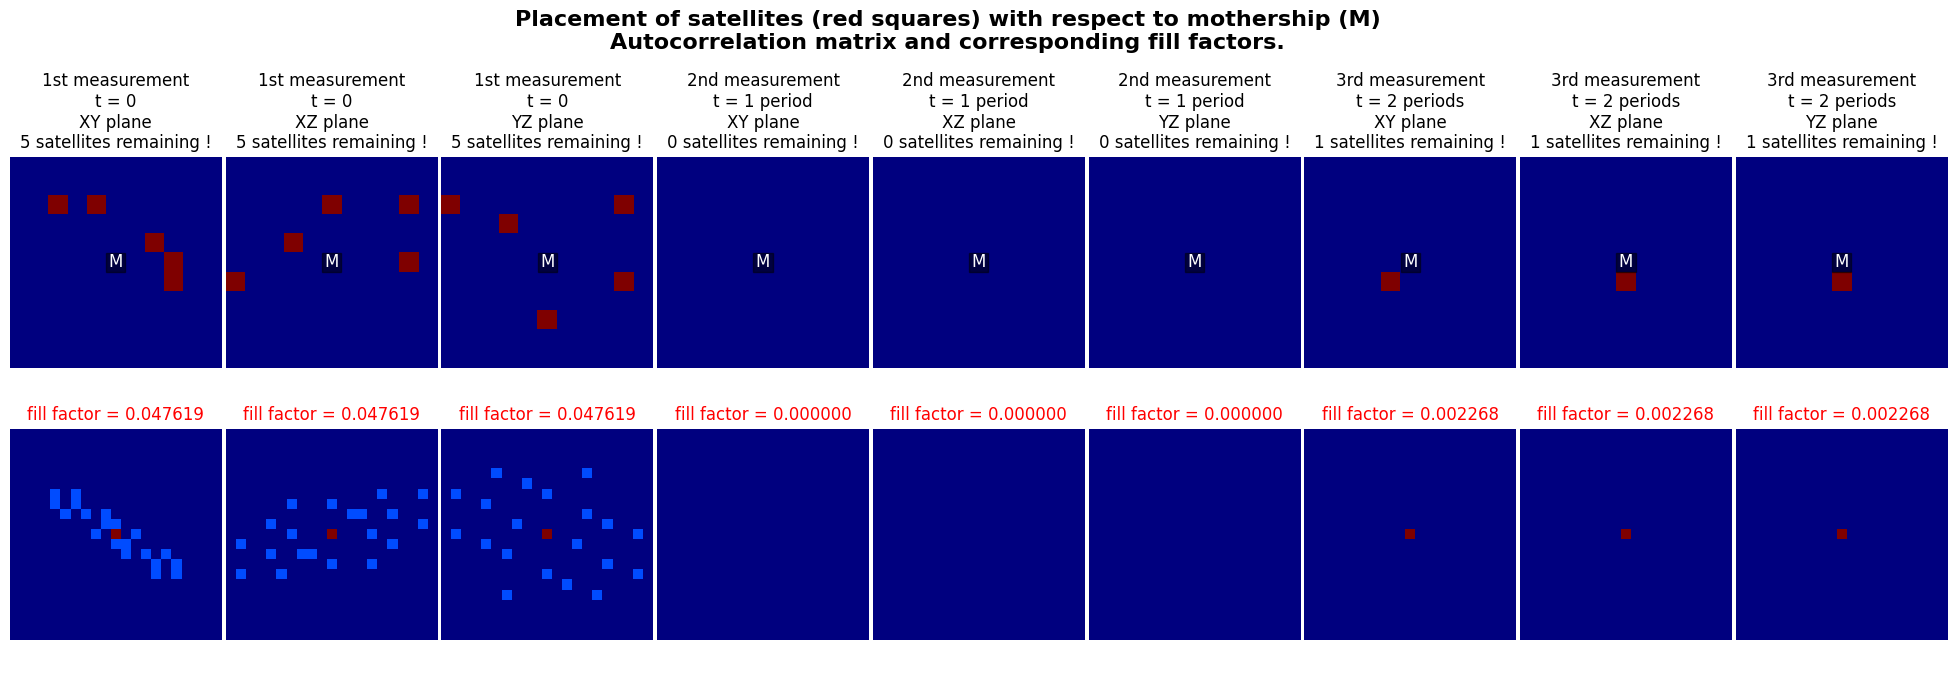

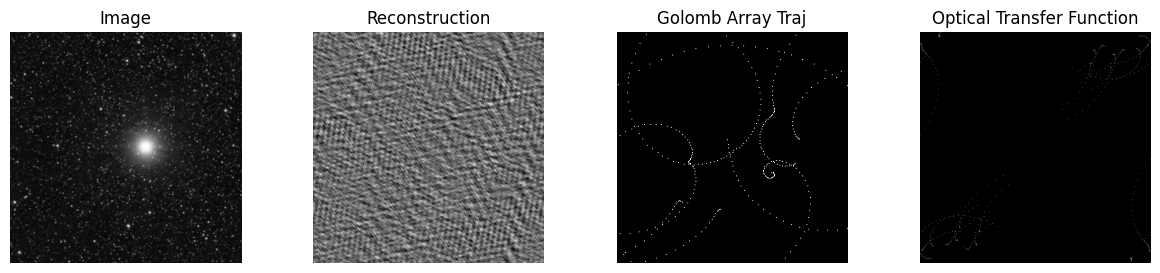

XZ


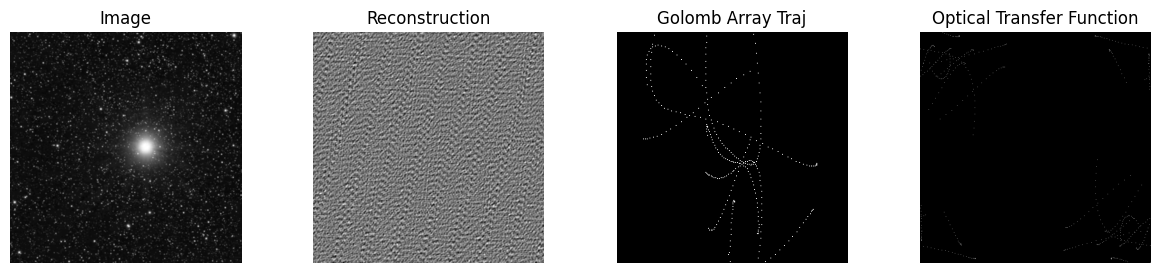

YZ


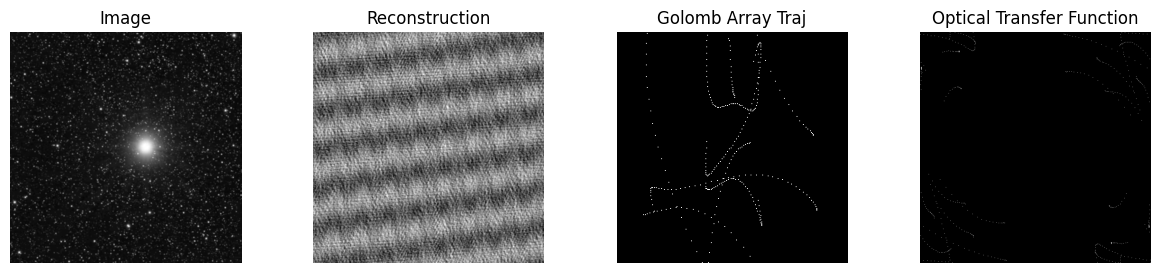

In [8]:
import pygad

def fitness_function_0(ga_instancem: pygad.GA,solution, solution_idx):
    return UDP.fitness_impl(x=solution, multi=False)[0]

def fitness_function_1(ga_instancem: pygad.GA,solution, solution_idx):
    return UDP.fitness_impl(x=solution, multi=False)[0] + 1

def callback_generations(ga_instance):
    print(f"{ga_instance.generations_completed}: Best sol. = {ga_instance.best_solution()[0]} Fitness = {ga_instance.best_solution()[1]}")

ga_instance = pygad.GA(
    num_generations = 500,
    fitness_func = fitness_function_1,
    save_best_solutions = False,
    on_generation=callback_generations,

    sol_per_pop = 50,  # Numeo di soluzioni per popolazione
    num_genes = 30,    # Numero di geni (Grandezza soluzione)
    gene_type = float,
    gene_space = np.linspace(-1.0, 1.0, 10**(4)),    # Valori assumibili da ogni gene

    parent_selection_type = "rws", # sss (steady-state selection), rws (roulette wheel selection), sus (stochastic universal selection), rank, random, tournament.
    keep_parents = 2,  # Numero di genitori mantenuti per ogni crossover (< sol_per_pop)

    num_parents_mating = 5,    # Numero di genitori selezionati per generare figli
    crossover_type = "single_point",   # single_point, two_points, uniform, and scattered .

    mutation_type = "random",    # random, swap, inversion, scramble, and adaptive
    mutation_probability = 0.2   # Probabilità di mutazione,
    )
ga_instance.run()

x_sol, fitness, _ = ga_instance.best_solution()

clear_output()
_ = ga_instance.plot_fitness() # Mostra grafico della convergenza
print_resoult(UDP,x_sol)
del ga_instance, fitness, x_sol

## Scipy

Doc: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html

solution:  [ 0.05191404  0.55611895  0.71759018  0.21311773  0.04054244 -0.10004603
  0.06367417  0.01383591  0.34351314 -0.23430867  0.33484487  0.64618772
  0.48836738  0.57532728 -0.35775122  0.83864708  0.16761584  0.39856703
  0.86809866 -0.28647717  0.14168258 -0.68402291  0.44881769  0.2541689
  0.08906725  0.2358314  -0.26091101  0.30527983 -0.4259539   0.25611156]
wrost Fill factor: -0.02041  ,	 wrost Empty factor(?) : 0.97959
XY


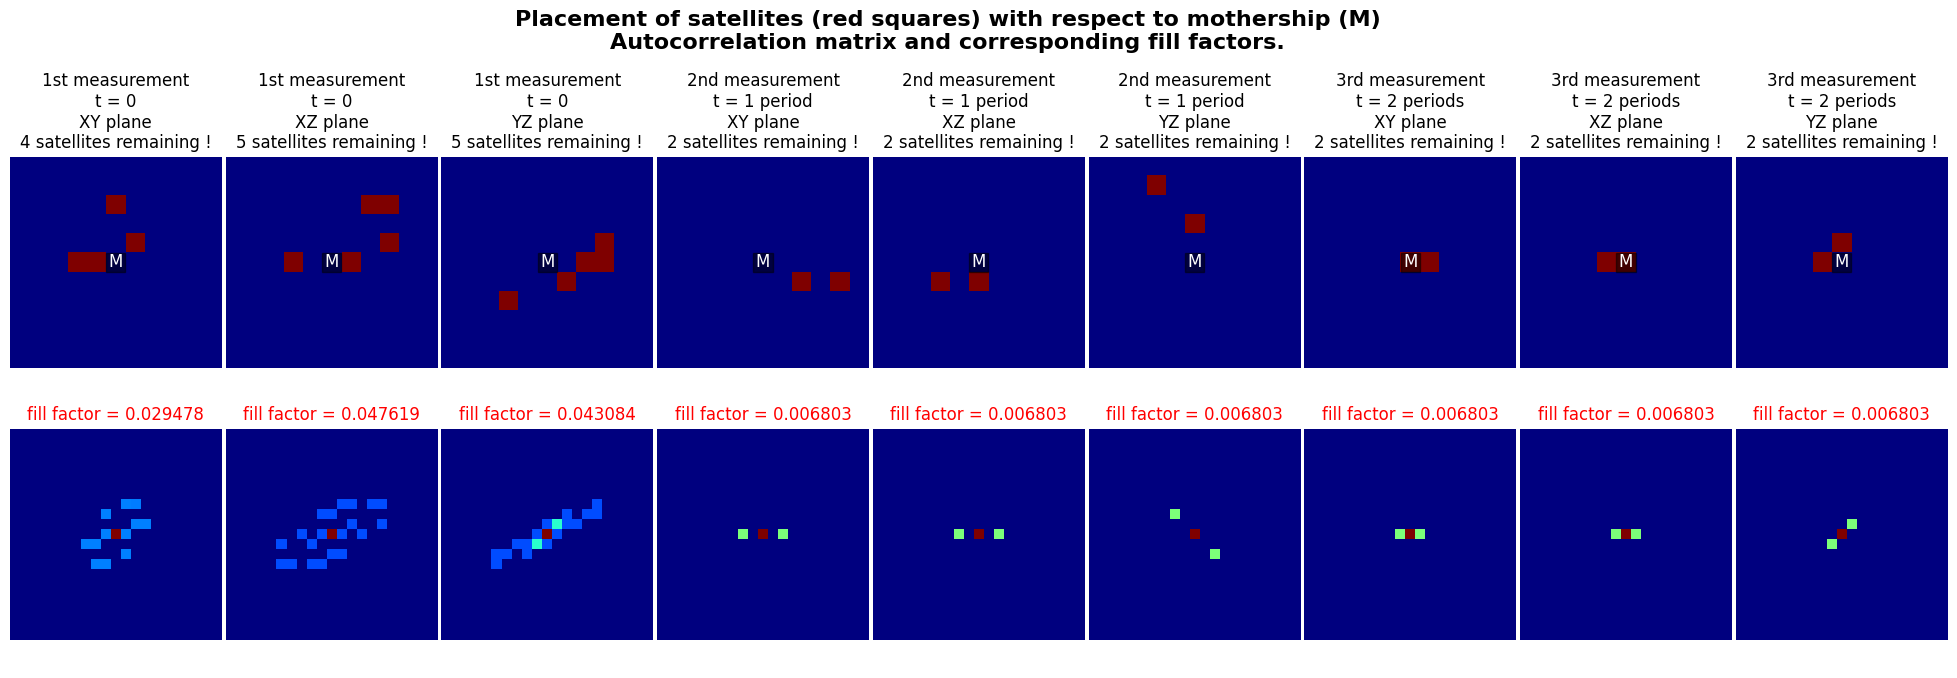

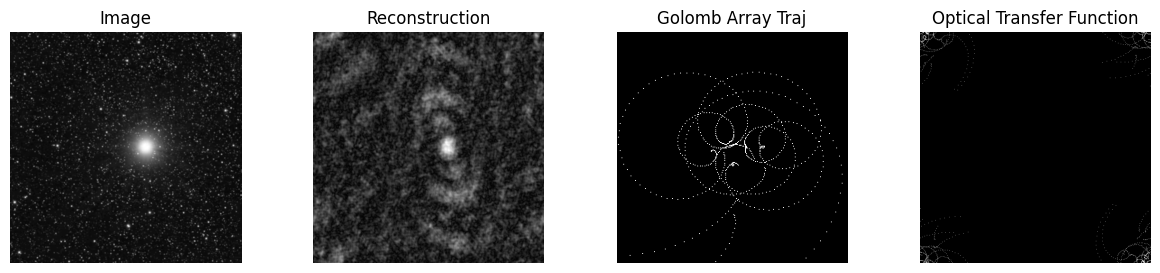

XZ


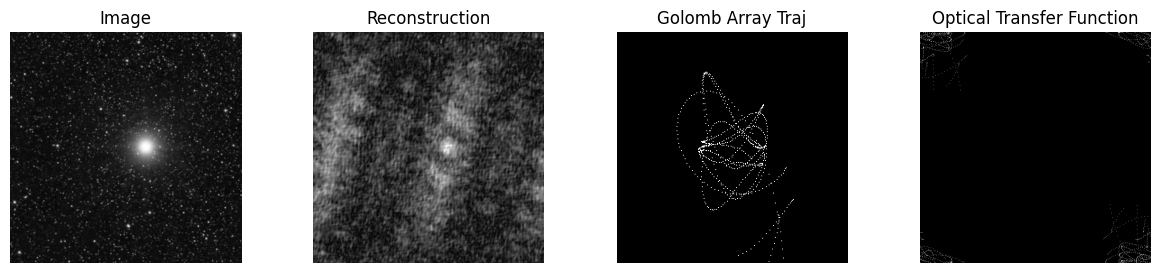

YZ


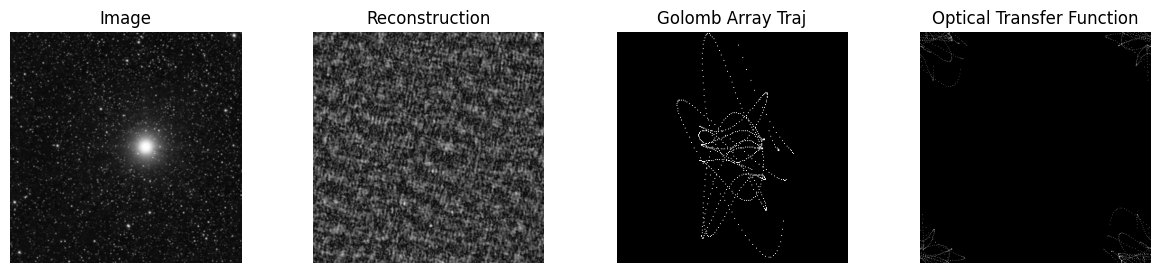

In [9]:
from scipy.optimize import differential_evolution

result = differential_evolution(
    init = 'latinhypercube',
    strategy = 'best1bin',
    func=lambda solution: UDP.fitness(solution)[0] + 1, 

    maxiter=500, 
    popsize=100, 
    bounds=[(-1.0, 1.0)] * UDP.n_sat * 6, 
    recombination=0.3,
    mutation=(0.1, 1), 
    
    polish = True,
    disp = True
    )

clear_output()
print_resoult(UDP,result.x)